In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv('Pfizer_Turnover _Prediction _Model.csv')

/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,13,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.iloc[:, [7,13,24,25,26,27,28,29,30]].head()

,DEPTCD,JOBSUBFUNCTION,CATEGORY,VOL_INVOL,ACTIONDT,ACTION,ACTIONCD,REASON,RSNCD
0,800399,Global Operations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,800390,Engineering Maintenance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,800066,Supply Chain Functions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,803386,Logistics & Supply Chain Mgmt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,802585,Product Mgmt/Brand Marketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,POS_LEVEL1,POS_LEVEL2,POS_LEVEL3,POS_LEVEL4,POS_LEVEL5,POSITIONLVL,DEPARTMENT,DEPTCD,RPTG_DIV_MAPPING,REGION,COUNTRY,LOCATION,JOB_FUNCTION,JOBSUBFUNCTION,LGTHOFSVC,TIMEINJOB,TIMEINPOSITION,COMPARATIO,GLBLDEPTLVL03,GLBLDEPTLVL04,GLBLDEPTLVL05,GLBLDEPTLVL06,Month_Year,CALYRMO,CATEGORY,VOL_INVOL,ACTIONDT,ACTION,ACTIONCD,REASON,RSNCD,Status,Country Level Manufacturing,Country Level Sales,Country Level R&D,Country Level Finance,Country Level Legal,Country Level HR,Country Level IT,Country Level Pharma Other,Country Level Cost of Living Index,Country Level Traffic Index,Country Level Time Index (in minutes),Country Level Time Ex Index,Country Level Inefficiencies Index,Country Level Unemployment Rate (%),Country Level Corruption Perception Index,Country Level Inflation (%),Country Level GDP (nominal) (in USD billion),Country Level Pharma Industry Growth,Country Level Labor Market Risk Index Score,Country Level Political Risk Index Score,Country Level Power distance,Country Level Individualism,Country Level Masculinity,Country Level Uncertainty avoidance,Country Level Long term orientation,Country Level Indulgence,RandomID
0,26264,10152554.0,10158817.0,10645908.0,10708518.0,5.0,Corporate Tax,800399,Global Operations,North America,United States,Peapack New Jersey,Global Operations,Global Operations,29.555099,2.587269,2.587269,1.190823,Finance & Business Ops,Finance,Corporate Tax,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119341.0
1,26264,47530.0,10551332.0,11241036.0,10233655.0,7.0,GSCPM,800390,Pfizer Global Supply,North America,United States,Pleasant Prairie W3 - Hospira,Engineering,Engineering Maintenance,26.948665,0.577687,0.577687,NaN,GSCPM,NaN,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134992.0
2,26264,47530.0,10551332.0,11241036.0,11240229.0,7.0,Pfizer Global Supply,800066,Pfizer Global Supply,North America,United States,Peapack New Jersey,Logistics & Supply Chain Mgmt,Supply Chain Functions,14.069815,0.060233,0.060233,0.974331,NaN,NaN,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78068.0
3,26264,10551122.0,10608626.0,10140857.0,132102.0,8.0,PSSM Drug Product Supply,803386,Worldwide Research & Development,North America,United States,"Groton, Connecticut",Logistics & Supply Chain Mgmt,Logistics & Supply Chain Mgmt,14.088980,3.835729,3.835729,1.113577,Medicinal Sciences,Pharm Sci Small Molecule,PSSM Drug Product Supply,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146210.0
4,26264,10655662.0,11269189.0,10655733.0,10261243.0,6.0,GEP Germany,802585,Pfizer Essential Health (PEH),Europe,Germany,Berlin,Marketing and Market Research,Product Mgmt/Brand Marketing,12.501027,6.053388,7.835729,NaN,GEP - Europe,GEP Germany,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.173282,0.177543,0.126411,0.156238,0.149136,0.160499,0.167600,0.175368,67.616667,96.49500,33.000000,321.450000,112.645000,0.0375,81.0,0.017,3700.613,0.048928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14471.0


In [6]:
df.shape

(4723161, 59)

In [7]:
df.describe()

,POS_LEVEL1,POS_LEVEL2,POS_LEVEL3,POS_LEVEL4,POS_LEVEL5,POSITIONLVL,LGTHOFSVC,TIMEINJOB,TIMEINPOSITION,COMPARATIO,CALYRMO,Status,Country Level Manufacturing,Country Level Sales,Country Level R&D,Country Level Finance,Country Level Legal,Country Level HR,Country Level IT,Country Level Pharma Other,Country Level Cost of Living Index,Country Level Traffic Index,Country Level Time Index (in minutes),Country Level Time Ex Index,Country Level Inefficiencies Index,Country Level Unemployment Rate (%),Country Level Corruption Perception Index,Country Level Inflation (%),Country Level GDP (nominal) (in USD billion),Country Level Pharma Industry Growth,Country Level Labor Market Risk Index Score,Country Level Political Risk Index Score,Country Level Power distance,Country Level Individualism,Country Level Masculinity,Country Level Uncertainty avoidance,Country Level Long term orientation,Country Level Indulgence,RandomID
count,4723161.0,4.719160e+06,4.718418e+06,4.710637e+06,4.669138e+06,4.717226e+06,4.710657e+06,4.717584e+06,4.715887e+06,3.652727e+06,4628.000000,4.723161e+06,2.746295e+06,2.746295e+06,2.746295e+06,2.746295e+06,2.746295e+06,2.746295e+06,2.746295e+06,2.746295e+06,3.272718e+06,3.224634e+06,3.224634e+06,3.224634e+06,3.224634e+06,3.263102e+06,3.279274e+06,3.279488e+06,3.279488e+06,443397.000000,2.185770e+06,2.185770e+06,2.174389e+06,2.174389e+06,2.174389e+06,2.173331e+06,2.145977e+06,2.125058e+06,4.723161e+06
mean,26264.0,9.869794e+06,7.577962e+06,9.289672e+06,9.621905e+06,8.262978e+00,1.025410e+01,4.384306e+00,2.767834e+00,9.843694e-01,202006.384831,9.798523e-04,1.899169e-01,1.944827e-01,1.384541e-01,1.709691e-01,1.629119e-01,1.756890e-01,1.836624e-01,1.924165e-01,6.377684e+01,1.798625e+02,4.202512e+01,3.386601e+03,1.960117e+02,5.260743e-02,6.065696e+01,5.551693e+00,9.671416e+03,0.036983,3.311445e+01,3.162852e+01,5.495309e+01,6.119168e+01,6.088578e+01,5.361062e+01,4.907110e+01,5.139063e+01,7.345978e+04
std,0.0,3.274930e+06,4.961976e+06,4.132689e+06,3.598412e+06,1.552915e+00,8.961745e+00,4.450215e+00,5.927415e+00,2.100718e+00,3.467083,3.128726e-02,2.980836e-02,3.049354e-02,2.169983e-02,2.690319e-02,2.545185e-02,2.758255e-02,2.926877e-02,4.670724e-02,1.863452e+01,3.737570e+01,6.145713e+00,2.858544e+03,4.567818e+01,3.001022e-02,1.701036e+01,2.650354e+02,8.702507e+03,0.037801,1.428198e+01,1.359204e+01,1.917465e+01,2.887185e+01,1.257734e+01,2.111712e+01,2.606718e+01,1.996095e+01,4.235335e+04
min,26264.0,2.340100e+04,1.354400e+04,1.932000e+03,2.200000e+01,1.000000e+00,-3.038741e+01,-6.735113e-01,-6.735113e-01,0.000000e+00,202001.000000,0.000000e+00,7.224378e-02,7.402027e-02,5.270243e-02,6.400000e-02,6.217703e-02,6.691432e-02,6.987514e-02,5.921622e-02,2.275333e+01,6.674000e+01,1.520000e+01,1.520000e+01,3.735000e+01,1.220000e-03,1.600000e+01,-1.500000e-02,1.252800e+01,-0.037743,1.400000e+01,0.000000e+00,1.100000e+01,6.000000e+00,5.000000e+00,8.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00
25%,26264.0,1.015255e+07,1.993100e+05,1.041658e+07,1.023755e+07,7.000000e+00,2.524298e+00,1.166324e+00,1.670089e-01,8.817809e-01,202003.000000,0.000000e+00,1.852513e-01,1.898067e-01,1.351424e-01,1.670299e-01,1.594376e-01,1.715853e-01,1.800000e-01,1.589502e-01,4.699400e+01,1.604000e+02,3.781100e+01,1.659330e+03,1.711050e+02,3.869000e-02,4.100000e+01,1.600000e-02,1.379548e+03,0.003074,1.800000e+01,2.500000e+01,4.000000e+01,3.200000e+01,5.600000e+01,4.000000e+01,2.600000e+01,2.900000e+01,3.676800e+04
50%,26264.0,1.065566e+07,1.061790e+07,1.065602e+07,1.065595e+07,8.000000e+00,7.567420e+00,2.748802e+00,4.271047e-01,9.795687e-01,202006.000000,0.000000e+00,1.940338e-01,1.986877e-01,1.415493e-01,1.748452e-01,1.668977e-01,1.796137e-01,1.875612e-01,1.957576e-01,7.136031e+01,1.814262e+02,3.952750e+01,2.178608e+03,2.087043e+02,4.400000e-02,6.900000e+01,2.100000e-02,5.070626e+03,0.039233,2.900000e+01,2.500000e+01,5.000000e+01,7.000000e+01,6.200000e+01,4.600000e+01,4.400000e+01,5.900000e+01,7.358200e+04
75%,26264.0,1.123547e+07,1.065596e+07,1.126913e+07,1.1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723161 entries, 0 to 4723160
Data columns (total 59 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   POS_LEVEL1                                    int64  
 1   POS_LEVEL2                                    float64
 2   POS_LEVEL3                                    float64
 3   POS_LEVEL4                                    float64
 4   POS_LEVEL5                                    float64
 5   POSITIONLVL                                   float64
 6   DEPARTMENT                                    object 
 7   DEPTCD                                        object 
 8   RPTG_DIV_MAPPING                              object 
 9   REGION                                        object 
 10  COUNTRY                                       object 
 11  LOCATION                                      object 
 12  JOB_FUNCTION                                  object 
 1

In [9]:
df.columns

Index(['POS_LEVEL1', 'POS_LEVEL2', 'POS_LEVEL3', 'POS_LEVEL4', 'POS_LEVEL5',
       'POSITIONLVL', 'DEPARTMENT', 'DEPTCD', 'RPTG_DIV_MAPPING', 'REGION',
       'COUNTRY', 'LOCATION', 'JOB_FUNCTION', 'JOBSUBFUNCTION', 'LGTHOFSVC',
       'TIMEINJOB', 'TIMEINPOSITION', 'COMPARATIO', 'GLBLDEPTLVL03',
       'GLBLDEPTLVL04', 'GLBLDEPTLVL05', 'GLBLDEPTLVL06', 'Month_Year',
       'CALYRMO', 'CATEGORY', 'VOL_INVOL', 'ACTIONDT', 'ACTION', 'ACTIONCD',
       'REASON', 'RSNCD', 'Status', 'Country Level Manufacturing',
       'Country Level Sales', 'Country Level R&D', 'Country Level Finance',
       'Country Level Legal', 'Country Level HR', 'Country Level IT',
       'Country Level Pharma Other', 'Country Level Cost of Living Index',
       'Country Level Traffic Index', 'Country Level Time Index (in minutes)',
       'Country Level Time Ex Index', 'Country Level Inefficiencies Index',
       'Country Level Unemployment Rate (%)',
       'Country Level Corruption Perception Index',
       'Cou

In [10]:
df_ran_sam = df.sample(n=10000, random_state=1)

<AxesSubplot:>

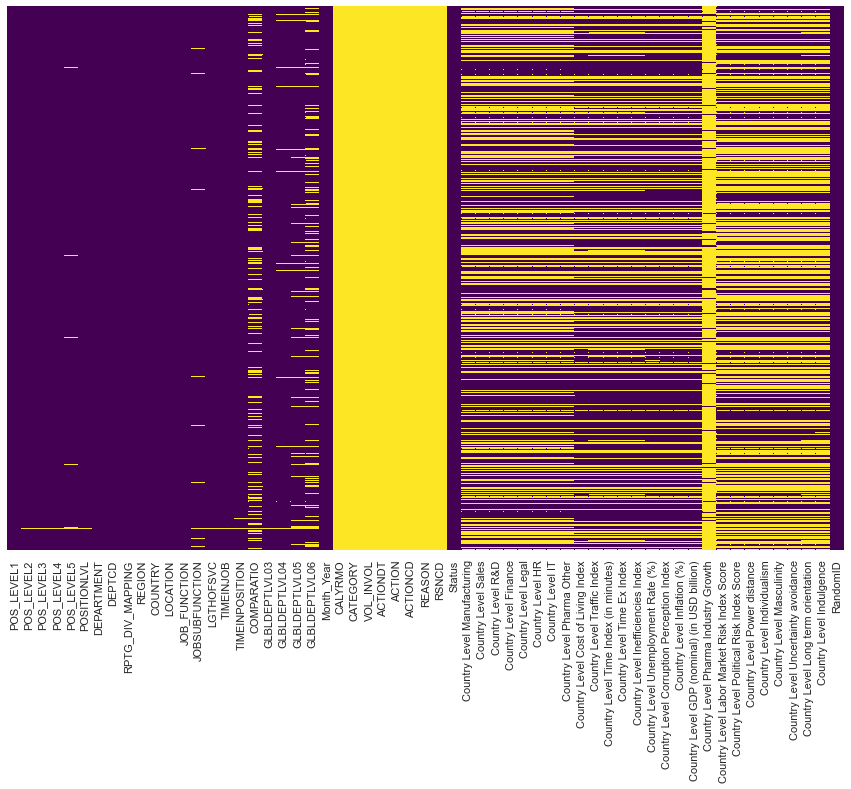

In [11]:
fig, ax = plt.subplots(figsize=(15,10))       
sns.heatmap(df_ran_sam.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
df.isnull().sum()

POS_LEVEL1                                            0
POS_LEVEL2                                         4001
POS_LEVEL3                                         4743
POS_LEVEL4                                        12524
POS_LEVEL5                                        54023
POSITIONLVL                                        5935
DEPARTMENT                                         1633
DEPTCD                                               25
RPTG_DIV_MAPPING                                      0
REGION                                                0
COUNTRY                                               0
LOCATION                                              0
JOB_FUNCTION                                          0
JOBSUBFUNCTION                                    96378
LGTHOFSVC                                         12504
TIMEINJOB                                          5577
TIMEINPOSITION                                     7274
COMPARATIO                                      

In [13]:
df[df['COMPARATIO'].isnull()].head()

,POS_LEVEL1,POS_LEVEL2,POS_LEVEL3,POS_LEVEL4,POS_LEVEL5,POSITIONLVL,DEPARTMENT,DEPTCD,RPTG_DIV_MAPPING,REGION,COUNTRY,LOCATION,JOB_FUNCTION,JOBSUBFUNCTION,LGTHOFSVC,TIMEINJOB,TIMEINPOSITION,COMPARATIO,GLBLDEPTLVL03,GLBLDEPTLVL04,GLBLDEPTLVL05,GLBLDEPTLVL06,Month_Year,CALYRMO,CATEGORY,VOL_INVOL,ACTIONDT,ACTION,ACTIONCD,REASON,RSNCD,Status,Country Level Manufacturing,Country Level Sales,Country Level R&D,Country Level Finance,Country Level Legal,Country Level HR,Country Level IT,Country Level Pharma Other,Country Level Cost of Living Index,Country Level Traffic Index,Country Level Time Index (in minutes),Country Level Time Ex Index,Country Level Inefficiencies Index,Country Level Unemployment Rate (%),Country Level Corruption Perception Index,Country Level Inflation (%),Country Level GDP (nominal) (in USD billion),Country Level Pharma Industry Growth,Country Level Labor Market Risk Index Score,Country Level Political Risk Index Score,Country Level Power distance,Country Level Individualism,Country Level Masculinity,Country Level Uncertainty avoidance,Country Level Long term orientation,Country Level Indulgence,RandomID
1,26264,47530.0,10551332.0,11241036.0,10233655.0,7.0,GSCPM,800390,Pfizer Global Supply,North America,United States,Pleasant Prairie W3 - Hospira,Engineering,Engineering Maintenance,26.948665,0.577687,0.577687,NaN,GSCPM,NaN,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134992.0
4,26264,10655662.0,11269189.0,10655733.0,10261243.0,6.0,GEP Germany,802585,Pfizer Essential Health (PEH),Europe,Germany,Berlin,Marketing and Market Research,Product Mgmt/Brand Marketing,12.501027,6.053388,7.835729,NaN,GEP - Europe,GEP Germany,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.173282,0.177543,0.126411,0.156238,0.149136,0.160499,0.167600,0.175368,67.616667,96.49500,33.000000,321.450000,112.645000,0.0375,81.0,0.017,3700.613,0.048928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14471.0
42,26264,10655777.0,10655858.0,10655908.0,10664618.0,7.0,ONC - US Sales Oncology,802835,Pfizer Innovative Health (PIH),North America,United States,Denver - Specialty Sales Offc,Sales,Field Sales Management,28.668036,9.837098,3.334702,NaN,PIH - Global Oncology,ONC - REG NA,ONC - US Sales Oncology,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116131.0
62,26264,47530.0,244244.0,11233017.0,10312618.0,8.0,Pharma Mfg Ops,800383,Pfizer Global Supply,North America,United States,Rochester,Engineering,Engineering Maintenance,43.852156,6.231348,5.349760,NaN,Pharma Mfg Ops,NaN,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99005.0
63,26264,47530.0,244244.0,11233017.0,10312618.0,8.0,Pharma Mfg Ops,800383,Pfizer Global Supply,North America,United States,Rochester,Engineering,Other - Engineering,42.855578,6.417522,5.349760,NaN,Pharma Mfg Ops,NaN,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112233.0


In [14]:
df.duplicated().sum()

0

In [15]:
df['Status'].value_counts()

0    4718533
1       4628
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

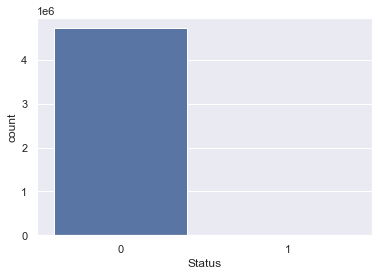

In [16]:
sns.countplot(x='Status', data=df)

# How many unique departments are there in the dataset?

In [17]:
df['DEPARTMENT'].nunique()

3446

In [18]:
df['DEPTCD'].nunique()

10383

# **Explore the COMPARATIO Column:**

/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='COMPARATIO'>

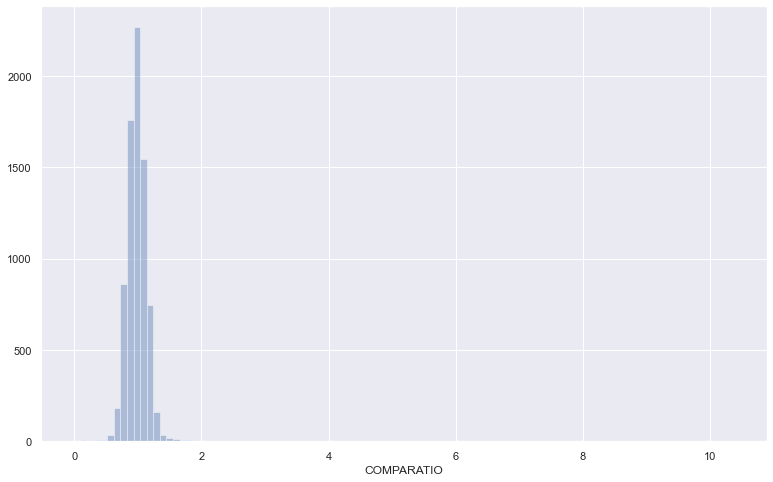

In [19]:
fig, ax = plt.subplots(figsize=(13,8))       
sns.distplot(df_ran_sam['COMPARATIO'].dropna(), kde=False, bins=100)

In [20]:
compr_min = df['COMPARATIO'].min()
compr_max = df['COMPARATIO'].max()
print('Range of COMPARATIO is:', compr_min, 'to', compr_max)

Range of COMPARATIO is: 0.0 to 3666.07915384615


In [21]:
compr_mean = df['COMPARATIO'].mean()
print('Mean of COMPRATIO is:', compr_mean)

Mean of COMPRATIO is: 0.984369436666505


## Summary Stats for Comparatio Column

In [22]:
df_comparatio_summ_stats = df.groupby('JOB_FUNCTION')['COMPARATIO'].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'sum'])
df_comparatio_summ_stats['range'] = df_comparatio_summ_stats['max'] - df_comparatio_summ_stats['min']
df_comparatio_summ_stats

,count,min,max,mean,median,std,sum,range
JOB_FUNCTION,,,,,,,,
Admin & Support Services,21469,0.005910,11.735050,1.051239,1.054337,0.266862,2.256905e+04,11.729140
Administrative,39668,0.000000,2.683647,1.019946,1.012785,0.188981,4.045920e+04,2.683647
Aviation and Transportation,2084,0.768455,1.252862,1.063859,1.048138,0.101188,2.217083e+03,0.484407
Bus Dev & Strategic Planning,22925,0.000000,1177.667737,1.057479,1.006769,7.772662,2.424272e+04,1177.667737
Continuous Imprv and Proj Mgmt,36305,0.000000,11.496000,0.979405,0.974033,0.137016,3.555730e+04,11.496000
Engineering,142886,0.000000,12.843530,1.004513,1.000003,0.158537,1.435308e+05,12.843530
"Environmental, Health & Safety",14427,0.000000,1.934524,1.016030,1.023318,0.141392,1.465826e+04,1.934524
Executive,169,0.745200,1.186047,1.013709,1.042801,0.097108,1.713168e+02,0.440847
Executive Leadership/Managemen,743,0.853988,1.221182,1.021140,1.015590,0.095327,7.587070e+02,0.367195


## Comparatio Quantiles

In [23]:
df['COMPARATIO'].quantile([.1, .25, .5, .75])

0.10    0.800000
0.25    0.881781
0.50    0.979569
0.75    1.072114
Name: COMPARATIO, dtype: float64

<AxesSubplot:>

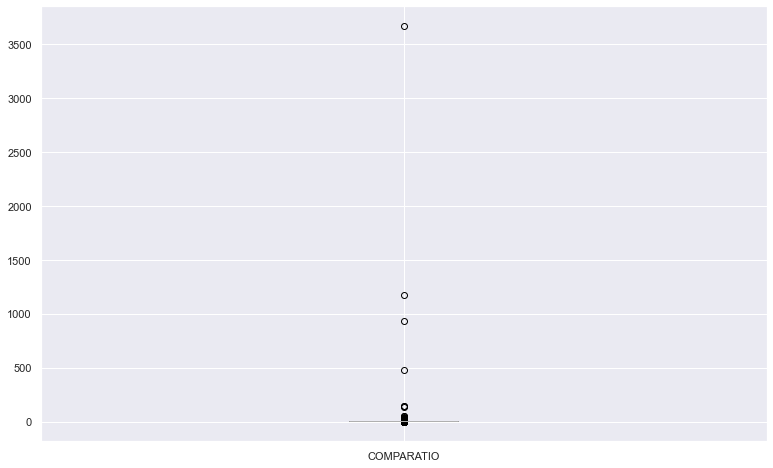

In [24]:
df.boxplot(column=['COMPARATIO'], figsize=(13, 8))

In [25]:
comparatio_outliers = df['COMPARATIO']> 3
len(df[comparatio_outliers])

794

In [26]:
# isolate the data where someone left the company
cond = df['Status'] == 1

In [27]:
left_company = df[cond]

In [28]:
left_company.shape

(4628, 59)

In [29]:
left_company['DEPARTMENT'].nunique()

598

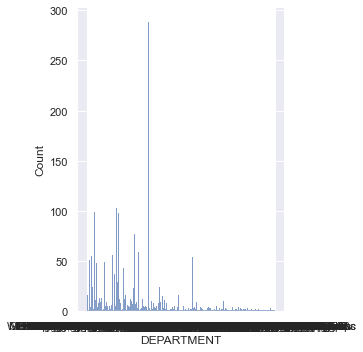

In [30]:
sns.displot(left_company['DEPARTMENT'].dropna(), kde=False, bins=1000)

In [31]:
top_depts = left_company.groupby('DEPARTMENT')['Status'].count().sort_values(ascending=False)
top_depts.head(10)

DEPARTMENT
EM - China                        288
PEH CN Acute Disease Biz Group    209
PBG China ONC&RD Sales            117
Kalamazoo Michigan                113
Vizag Manufacturing               112
Sterile Injectable Ops DOM        103
PEH - APAC                         99
PGS - Pharma Mfg Ops               98
WSR-Safety, EP & Generics Reg      95
QO Specialty/Biotech               93
Name: Status, dtype: int64

<AxesSubplot:title={'center':'Top 30 Turnovers By Department'}, xlabel='Department', ylabel='Sum of People Who Left'>

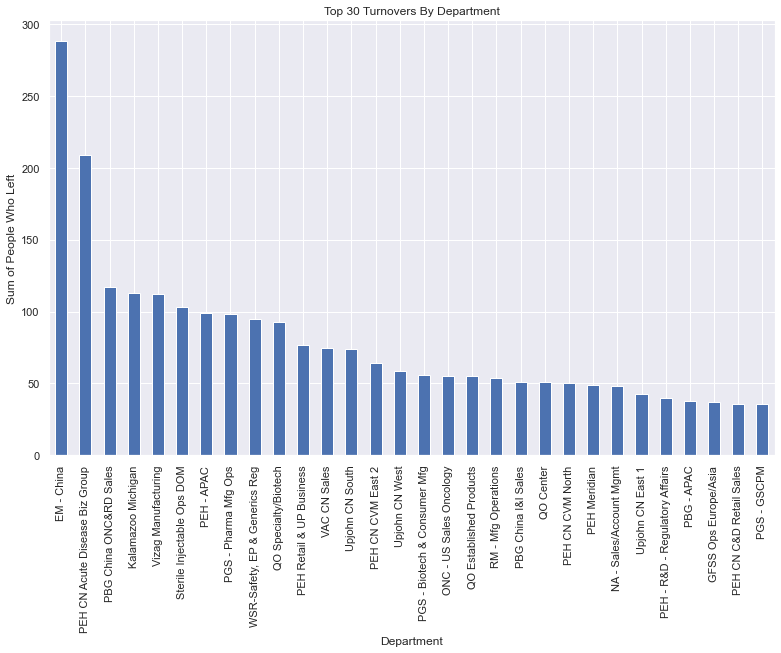

In [32]:
top_30 = top_depts.head(30)
top_30.plot(kind='bar', title='Top 30 Turnovers By Department', ylabel='Sum of People Who Left',
         xlabel='Department', figsize=(13, 8))

# See if we can break the departments down into larger categories...

## See if each of the rows maps to one of:
1. Country Level Manufacturing                     
2. Country Level Sales                             
3. Country Level R&D                               
4. Country Level Finance                           
5. Country Level Legal                             
6. Country Level HR                                
7. Country Level IT                                
8. Country Level Pharma Other                      

### What I tried to do here (and failed):
1. Create a new df that is just the country level data for demand pressure to see if I could use the demand pressure job categories as a higher level aggregation of department info.
2. But this would really only work if there is only one of these columns filled out for each row. For example, if someone who works a manufacturing job also has Country Level Sales, Country Level R&D, etc., filled out for their row, how do we know which demand pressure actually "applied" to this person's job?
3. Result: there were a bunch of rows that had all 8 columns filled out, and a bunch that had none of them filled out, so I don't think we can use this to divide the departments into larger categories?

In [33]:
demand_pressure_cols = ['COUNTRY','Country Level Manufacturing',
    'Country Level Sales', 'Country Level R&D', 'Country Level Finance',
    'Country Level Legal', 'Country Level HR', 'Country Level IT',
    'Country Level Pharma Other']

df_dem_press = df[demand_pressure_cols]
df_dem_press.head()

,COUNTRY,Country Level Manufacturing,Country Level Sales,Country Level R&D,Country Level Finance,Country Level Legal,Country Level HR,Country Level IT,Country Level Pharma Other
0,United States,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198
1,United States,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198
2,United States,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198
3,United States,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198
4,Germany,0.173282,0.177543,0.126411,0.156238,0.149136,0.160499,0.167600,0.175368


In [34]:
cols_to_check = ['Country Level Manufacturing',
    'Country Level Sales', 'Country Level R&D', 'Country Level Finance',
    'Country Level Legal', 'Country Level HR', 'Country Level IT',
    'Country Level Pharma Other']
df_dem_press['all_nan'] = df_dem_press[cols_to_check].isnull().apply(lambda x: all(x), axis=1)

<ipython-input-34-b5e21ad9b5ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dem_press['all_nan'] = df_dem_press[cols_to_check].isnull().apply(lambda x: all(x), axis=1)


In [35]:
df_dem_press.head()

,COUNTRY,Country Level Manufacturing,Country Level Sales,Country Level R&D,Country Level Finance,Country Level Legal,Country Level HR,Country Level IT,Country Level Pharma Other,all_nan
0,United States,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,False
1,United States,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,False
2,United States,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,False
3,United States,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,False
4,Germany,0.173282,0.177543,0.126411,0.156238,0.149136,0.160499,0.167600,0.175368,False


In [36]:
df_dem_press['all_nan'].value_counts()

False    2746295
True     1976866
Name: all_nan, dtype: int64

In [37]:
condition_null = df_dem_press['all_nan'] == True
df_dem_press[condition_null]['COUNTRY'].unique()

array(['Morocco', 'Viet Nam', 'Colombia', 'Ireland', 'Norway', 'Spain',
       'Czech Republic', 'Hong Kong', 'Greece', 'Israel', 'Costa Rica',
       'Denmark', 'Finland', 'Taiwan', 'Austria', 'Guatemala', 'Honduras',
       'Nicaragua', 'Panama', 'El Salvador', 'Switzerland', 'Philippines',
       'Venezuela', 'Ecuador', 'Hungary', 'Chile', 'Poland', 'Portugal',
       'Luxembourg', 'Peru', 'Malaysia', 'Indonesia', 'Thailand',
       'New Zealand', 'Croatia', 'Serbia', 'Pakistan', 'Egypt',
       'Bulgaria', 'Slovenia', 'Slovakia', 'Belarus', 'Lebanon', 'Oman',
       'Latvia', 'Romania', 'Uruguay', 'Bolivia', 'Qatar', 'Jordan',
       'Kuwait', 'Bahrain', 'Kazakhstan', 'Ukraine', 'Lithuania',
       'Algeria', 'Senegal', 'Ivory Coast', 'Cameroon', 'Tunisia',
       'Estonia', 'Dominican Republic', 'Nigeria', 'Macao', 'Ghana',
       'Bosnia and Herzegovina', 'Georgia', 'Kenya', 'Cypress', 'Cyprus',
       'Brunei Darussalam', 'United States', 'United Kingdom', 'China',
       'Austr

In [38]:
df_dem_press[condition_null]['COUNTRY'].nunique()

98

In [39]:
df['COUNTRY'].nunique()

98

In [40]:
df['Month_Year'].unique()

array(['January_2017', 'February_2017', 'March_2017', 'April_2017',
       'May_2017', 'June_2017', 'July_2017', 'August_2017',
       'September_2017', 'October_2017', 'November_2017', 'December_2017',
       'January_2018', 'February_2018', 'March_2018', 'April_2018',
       'May_2018', 'June_2018', 'July_2018', 'August_2018',
       'September_2018', 'October_2018', 'November_2018', 'December_2018',
       'January_2019', 'February_2019', 'March_2019', 'April_2019',
       'May_2019', 'June_2019', 'July_2019', 'August_2019',
       'September_2019', 'October_2019', 'November_2019', 'December_2019',
       'January_2020', 'February_2020', 'March_2020', 'April_2020',
       'May_2020', 'June_2020', 'July_2020', 'August_2020',
       'September_2020', 'October_2020', 'November_2020', 'December_2020',
       'January_2021', 'February_2021', 'March_2021', 'April_2021',
       'May_2021'], dtype=object)

# Maybe use Job Function instead?

In [41]:
df['JOB_FUNCTION'].nunique()

32

In [42]:
df['JOB_FUNCTION'].unique()

array(['Global Operations', 'Engineering',
       'Logistics & Supply Chain Mgmt', 'Marketing and Market Research',
       'Finance & Accounting', 'Regulatory Affairs',
       'Quality Assurance and Control', 'Legal Affairs',
       'Information & Business Tech', 'Human Resources',
       'Global Procurement', 'Sales', 'Continuous Imprv and Proj Mgmt',
       'Admin & Support Services', 'Research and Development',
       'Manufacturing', 'Medical', 'Bus Dev & Strategic Planning',
       'Public Affairs & Communication', 'Flight Operations',
       'Environmental, Health & Safety', 'Mkt & Sales/Commercial Bus',
       'Market Access', 'Executive', 'Non-Sales', 'Generic',
       'Sales Operations & Admin', 'Administrative', 'Support Services',
       'Sales Training', 'Aviation and Transportation',
       'Executive Leadership/Managemen'], dtype=object)

In [43]:
dfg_jf = df.groupby('JOB_FUNCTION')['Status'].sum()
dfg_jf

JOB_FUNCTION
Admin & Support Services             0
Administrative                      47
Aviation and Transportation          0
Bus Dev & Strategic Planning        16
Continuous Imprv and Proj Mgmt      38
Engineering                        195
Environmental, Health & Safety      19
Executive                            0
Executive Leadership/Managemen       0
Finance & Accounting               168
Flight Operations                    0
Generic                              0
Global Operations                    5
Global Procurement                  27
Human Resources                     25
Information & Business Tech         53
Legal Affairs                       22
Logistics & Supply Chain Mgmt      110
Manufacturing                      646
Market Access                       53
Marketing and Market Research      170
Medical                            428
Mkt & Sales/Commercial Bus          35
Non-Sales                            0
Public Affairs & Communication      29
Quality Assu

<AxesSubplot:title={'center':'Turnover by Job function'}, xlabel='Job Function', ylabel='Sum of People Who Left'>

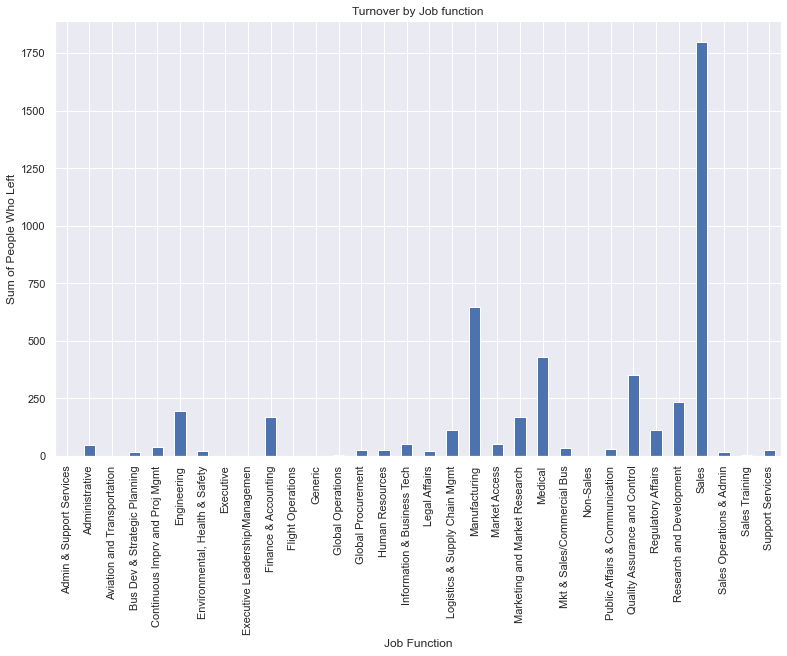

In [44]:
dfg_jf.plot(kind='bar', title='Turnover by Job function', ylabel='Sum of People Who Left',
         xlabel='Job Function', figsize=(13, 8))

In [45]:
df.corr()

,POS_LEVEL1,POS_LEVEL2,POS_LEVEL3,POS_LEVEL4,POS_LEVEL5,POSITIONLVL,LGTHOFSVC,TIMEINJOB,TIMEINPOSITION,COMPARATIO,CALYRMO,Status,Country Level Manufacturing,Country Level Sales,Country Level R&D,Country Level Finance,Country Level Legal,Country Level HR,Country Level IT,Country Level Pharma Other,Country Level Cost of Living Index,Country Level Traffic Index,Country Level Time Index (in minutes),Country Level Time Ex Index,Country Level Inefficiencies Index,Country Level Unemployment Rate (%),Country Level Corruption Perception Index,Country Level Inflation (%),Country Level GDP (nominal) (in USD billion),Country Level Pharma Industry Growth,Country Level Labor Market Risk Index Score,Country Level Political Risk Index Score,Country Level Power distance,Country Level Individualism,Country Level Masculinity,Country Level Uncertainty avoidance,Country Level Long term orientation,Country Level Indulgence,RandomID
POS_LEVEL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POS_LEVEL2,NaN,1.000000,0.283815,0.074876,0.113637,0.042915,-0.038843,0.007505,-0.181836,-0.000882,-0.000775,0.007677,0.032849,0.029683,0.030702,0.030537,0.027017,0.030286,0.033105,0.003929,-0.055694,0.028103,0.067954,0.018314,0.025799,-0.021640,-0.097423,0.002985,0.029817,0.045509,0.087700,0.110824,0.109080,-0.120930,0.015286,0.005117,0.092618,-0.097728,-0.004439
POS_LEVEL3,NaN,0.283815,1.000000,0.433877,0.144335,-0.376698,-0.033137,-0.031380,-0.003547,0.002922,-0.046871,0.001648,-0.003425,-0.010230,-0.001658,-0.001505,-0.001355,-0.002808,0.004680,-0.012904,-0.073813,0.052870,0.120915,0.068671,0.004572,0.004838,-0.135711,-0.024337,0.003728,-0.117584,0.100497,0.193696,0.171575,-0.208716,0.018068,0.017952,0.138560,-0.138424,-0.006009
POS_LEVEL4,NaN,0.074876,0.433877,1.000000,0.186189,-0.145069,-0.045863,-0.084328,-0.035675,0.002213,0.003749,0.006099,0.009494,0.002360,0.008023,0.012380,0.009531,0.007457,0.010008,0.010196,-0.054045,0.052678,0.066210,0.049597,0.022571,-0.023866,-0.081011,-0.031432,0.049319,-0.091271,0.022096,0.094639,0.106406,-0.075544,-0.011511,0.007851,0.077466,-0.074059,-0.004055
POS_LEVEL5,NaN,0.113637,0.144335,0.186189,1.000000,-0.025538,-0.002120,-0.077908,-0.059325,0.001396,0.067244,0.000331,0.029063,0.033524,0.039571,0.024586,0.036951,0.033893,0.038929,0.062634,-0.069322,0.100706,0.099800,0.094178,0.109527,-0.063955,-0.079883,-0.008476,0.027979,-0.157439,-0.008854,0.005196,0.004834,-0.016134,0.020301,-0.005214,-0.071217,-0.032521,-0.004383
POSITIONLVL,NaN,0.042915,-0.376698,-0.145069,-0.025538,1.000000,-0.124815,-0.040857,-0.058770,-0.009852,0.090982,0.001665,-0.022909,-0.024068,-0.028624,-0.026658,-0.022089,-0.025790,-0.027747,-0.190028,-0.180148,0.116315,0.168341,0.199386,0.040829,-0.016594,-0.182426,0.002892,-0.154979,0.048730,0.170109,0.050388,0.139812,-0.116372,0.006267,0.010167,0.098233,-0.162635,0.003744
LGTHOFSVC,NaN,-0.038843,-0.033137,-0.045863,-0.002120,-0.124815,1.000000,0.548918,0.376432,0.024903,0.025175,-0.015218,0.035552,0.048908,0.052220,0.033865,0.041973,0.045810,0.038182,0.233354,0.307960,-0.228253,-0.238735,-0.244804,-0.139426,0.027854,0.295006,-0.002415,0.057438,-0.103083,-0.259344,-0.282019,-0.294530,0.275239,0.124826,0.182632,-0.136028,0.217396,0.000666
TIMEINJOB,NaN,0.007505,-0.031380,-0.084328,-0.077908,-0.040857,0.548918,1.000000,0.237731,0.018713,0.032455,-0.008258,0.000579,0.008766,0.007298,-0.002066,0.000473,0.002119,0.000973,0.062383,0.104516,-0.132266,-0.135986,-0.131644,-0.086399,0.088023,0.094952,0.008186,-0.062256,0.101560,-0.039231,-0.070533,-0.132056,0.088038,-0.038816,0.140259,-0.065854,0.097432,0.002207
TIMEINPOSITION,NaN,-0.181836,-0.003547,-0.035675,-0.059325,-0.058770,0.376432,0.237731,1.000000,0.012581,0.458718,-0.012745,-0.051567,-0.047838,-0.047910,-0.046028,-0.042271,-0.046597,-0.050304,0.129050,0.234461,-0.138076,-0.162291,-0.154591,-0.078043,0.033967,0.243185,-0.010344,0.053129,-0.081110,-0

<AxesSubplot:>

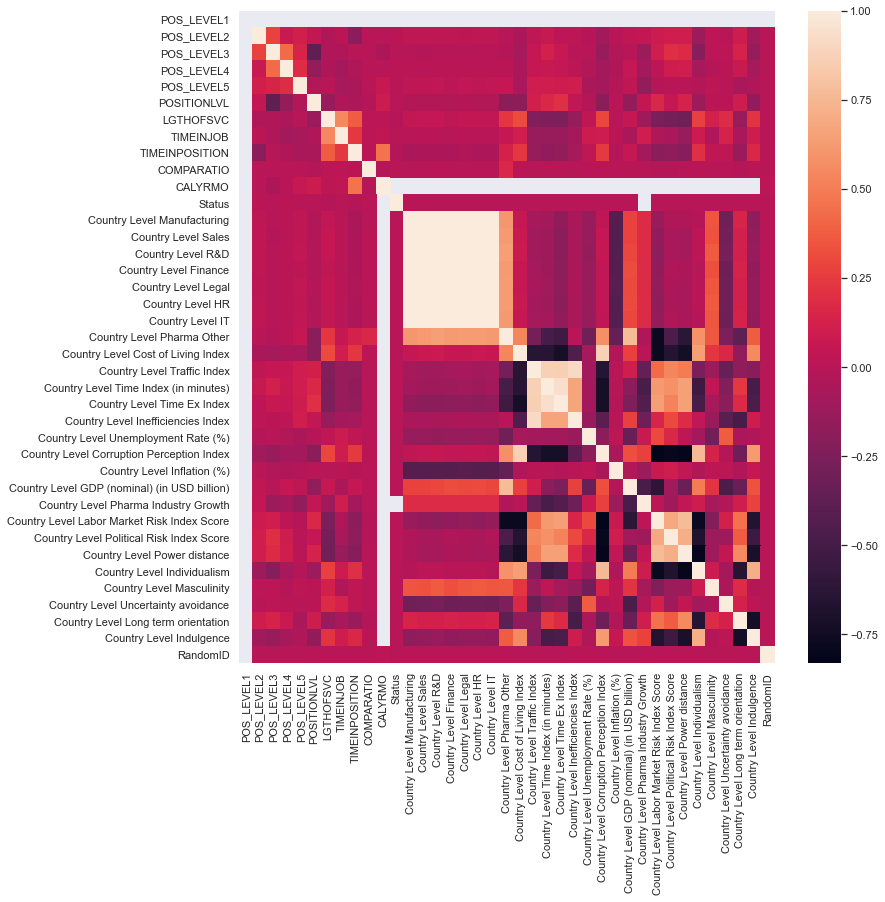

In [46]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(df.corr())

## Let's Try to Fill Out the Country Columns

### First fix the country names that are duplicated because of misspellings

In [47]:
country_names_unique = df['COUNTRY'].unique()
np.sort(country_names_unique)

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahrain',
       'Belarus', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei', 'Brunei Darussalam', 'Bulgaria', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cypress', 'Cyprus', 'Czech Republic',
       'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hong Kong',
       'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Korea, Republic of', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania',
       'Luxembourg', 'Macao', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway',
       'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Qatar', 'Romania', 

In [48]:
df['COUNTRY'].nunique()

98

### We need to replace the following:
1. Viet Nam -> Vietnam
2. Brunei Darussalam -> Brunei
3. Ivory Coast -> Cote d'Ivoire

In [49]:
def fix_country_names(country_name):
    if country_name == 'Viet Nam':
        country_name = 'Vietnam'
    elif country_name == 'Brunei Darussalam':
        country_name = 'Brunei'
    elif country_name == 'Ivory Coast':
        country_name = "Cote d'Ivoire"
    return country_name

In [50]:
df['COUNTRY'] = df['COUNTRY'].apply(fix_country_names)


In [51]:
df.head()

,POS_LEVEL1,POS_LEVEL2,POS_LEVEL3,POS_LEVEL4,POS_LEVEL5,POSITIONLVL,DEPARTMENT,DEPTCD,RPTG_DIV_MAPPING,REGION,COUNTRY,LOCATION,JOB_FUNCTION,JOBSUBFUNCTION,LGTHOFSVC,TIMEINJOB,TIMEINPOSITION,COMPARATIO,GLBLDEPTLVL03,GLBLDEPTLVL04,GLBLDEPTLVL05,GLBLDEPTLVL06,Month_Year,CALYRMO,CATEGORY,VOL_INVOL,ACTIONDT,ACTION,ACTIONCD,REASON,RSNCD,Status,Country Level Manufacturing,Country Level Sales,Country Level R&D,Country Level Finance,Country Level Legal,Country Level HR,Country Level IT,Country Level Pharma Other,Country Level Cost of Living Index,Country Level Traffic Index,Country Level Time Index (in minutes),Country Level Time Ex Index,Country Level Inefficiencies Index,Country Level Unemployment Rate (%),Country Level Corruption Perception Index,Country Level Inflation (%),Country Level GDP (nominal) (in USD billion),Country Level Pharma Industry Growth,Country Level Labor Market Risk Index Score,Country Level Political Risk Index Score,Country Level Power distance,Country Level Individualism,Country Level Masculinity,Country Level Uncertainty avoidance,Country Level Long term orientation,Country Level Indulgence,RandomID
0,26264,10152554.0,10158817.0,10645908.0,10708518.0,5.0,Corporate Tax,800399,Global Operations,North America,United States,Peapack New Jersey,Global Operations,Global Operations,29.555099,2.587269,2.587269,1.190823,Finance & Business Ops,Finance,Corporate Tax,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119341.0
1,26264,47530.0,10551332.0,11241036.0,10233655.0,7.0,GSCPM,800390,Pfizer Global Supply,North America,United States,Pleasant Prairie W3 - Hospira,Engineering,Engineering Maintenance,26.948665,0.577687,0.577687,NaN,GSCPM,NaN,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134992.0
2,26264,47530.0,10551332.0,11241036.0,11240229.0,7.0,Pfizer Global Supply,800066,Pfizer Global Supply,North America,United States,Peapack New Jersey,Logistics & Supply Chain Mgmt,Supply Chain Functions,14.069815,0.060233,0.060233,0.974331,NaN,NaN,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78068.0
3,26264,10551122.0,10608626.0,10140857.0,132102.0,8.0,PSSM Drug Product Supply,803386,Worldwide Research & Development,North America,United States,"Groton, Connecticut",Logistics & Supply Chain Mgmt,Logistics & Supply Chain Mgmt,14.088980,3.835729,3.835729,1.113577,Medicinal Sciences,Pharm Sci Small Molecule,PSSM Drug Product Supply,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.193002,0.197747,0.140796,0.174018,0.166108,0.178764,0.186674,0.233198,77.141081,181.42619,39.171905,2043.656667,208.704286,0.0436,74.0,0.021,19485.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146210.0
4,26264,10655662.0,11269189.0,10655733.0,10261243.0,6.0,GEP Germany,802585,Pfizer Essential Health (PEH),Europe,Germany,Berlin,Marketing and Market Research,Product Mgmt/Brand Marketing,12.501027,6.053388,7.835729,NaN,GEP - Europe,GEP Germany,NaN,NaN,January_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.173282,0.177543,0.126411,0.156238,0.149136,0.160499,0.167600,0.175368,67.616667,96.49500,33.000000,321.450000,112.645000,0.0375,81.0,0.017,3700.613,0.048928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14471.0


In [52]:
country_names_unique = df['COUNTRY'].unique()
np.sort(country_names_unique)

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahrain',
       'Belarus', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei', 'Bulgaria', 'Cameroon', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cypress', 'Cyprus', 'Czech Republic', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Korea, Republic of', 'Kuwait', 'Latvia',
       'Lebanon', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia',
       'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Russian Federation', 'Saudi Arabia'

In [53]:
df['COUNTRY'].nunique()

95

In [54]:
all_cols = df.columns
country_cols = []
for col in all_cols:
    if col.startswith('Country Level'):
        country_cols.append(col)

## Pseudocode for Filling in the Country Level Data:


### Import 

In [55]:
1070434 / len(df)

0.22663508612134967

In [56]:
df_dp = pd.read_csv('demand_pressure_csv.csv')

In [57]:
df_dp.head()

,Country,City,Mapped Location,Year,Manufacturing,Sales,R&D,Finance,Legal,HR,IT,Pharma Other
0,Argentina,Buenos Aires,NaN,2015.0,11.0%,11.3%,8.0%,9.9%,9.5%,10.2%,10.6%,9.0%
1,Argentina,Buenos Aires,NaN,2016.0,6.3%,6.5%,4.6%,5.7%,5.5%,5.9%,6.1%,5.2%
2,Argentina,Buenos Aires,NaN,2017.0,11.2%,11.5%,8.2%,10.1%,9.7%,10.4%,10.9%,9.2%
3,Argentina,Buenos Aires,NaN,2018.0,8.1%,8.3%,5.9%,7.3%,6.9%,7.5%,7.8%,6.6%
4,Argentina,Buenos Aires,NaN,2019.0,8.3%,8.4%,6.0%,7.5%,7.3%,7.4%,7.9%,6.5%


In [58]:
df_dp.isnull().sum()

Country              0
City                 0
Mapped Location    671
Year               280
Manufacturing      280
Sales              280
R&D                280
Finance            280
Legal              280
HR                 280
IT                 280
Pharma Other       280
dtype: int64

In [59]:
df_dp.columns

Index(['Country', 'City', 'Mapped Location', 'Year', 'Manufacturing', 'Sales',
       'R&D', 'Finance', 'Legal', 'HR', 'IT', 'Pharma Other'],
      dtype='object')

In [60]:
df_dp.shape

(795, 12)

<AxesSubplot:>

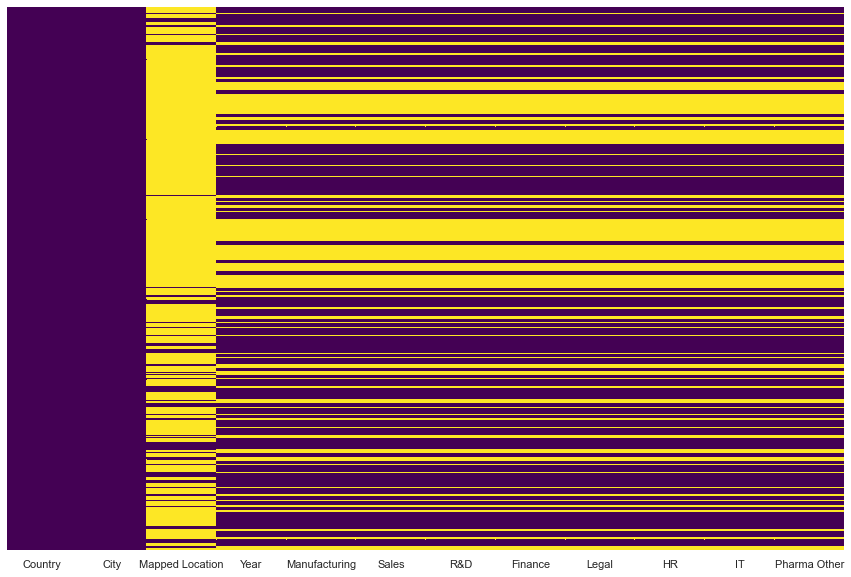

In [61]:
fig, ax = plt.subplots(figsize=(15,10))       
sns.heatmap(df_dp.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [62]:
# drop mapped location column:
df_dp = df_dp.drop(['Mapped Location', 'City'], 1)

In [63]:
df_dp = df_dp.dropna()

In [64]:
df_dp.isnull().sum()

Country          0
Year             0
Manufacturing    0
Sales            0
R&D              0
Finance          0
Legal            0
HR               0
IT               0
Pharma Other     0
dtype: int64

In [65]:
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 789
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        515 non-null    object 
 1   Year           515 non-null    float64
 2   Manufacturing  515 non-null    object 
 3   Sales          515 non-null    object 
 4   R&D            515 non-null    object 
 5   Finance        515 non-null    object 
 6   Legal          515 non-null    object 
 7   HR             515 non-null    object 
 8   IT             515 non-null    object 
 9   Pharma Other   515 non-null    object 
dtypes: float64(1), object(9)
memory usage: 44.3+ KB


In [66]:
df_dp['Year'] = df_dp['Year'].astype(int)

In [67]:
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 789
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        515 non-null    object
 1   Year           515 non-null    int64 
 2   Manufacturing  515 non-null    object
 3   Sales          515 non-null    object
 4   R&D            515 non-null    object
 5   Finance        515 non-null    object
 6   Legal          515 non-null    object
 7   HR             515 non-null    object
 8   IT             515 non-null    object
 9   Pharma Other   515 non-null    object
dtypes: int64(1), object(9)
memory usage: 44.3+ KB


In [68]:
df_dp.set_index('Country', inplace=True)
df_dp.stack()

Country                     
Argentina      Year              2015
               Manufacturing    11.0%
               Sales            11.3%
               R&D               8.0%
               Finance           9.9%
                                ...  
United States  Finance          16.9%
               Legal            16.7%
               HR               18.2%
               IT               19.5%
               Pharma Other     25.7%
Length: 4635, dtype: object

In [69]:
df_dp.head()

,Year,Manufacturing,Sales,R&D,Finance,Legal,HR,IT,Pharma Other
Country,,,,,,,,,
Argentina,2015,11.0%,11.3%,8.0%,9.9%,9.5%,10.2%,10.6%,9.0%
Argentina,2016,6.3%,6.5%,4.6%,5.7%,5.5%,5.9%,6.1%,5.2%
Argentina,2017,11.2%,11.5%,8.2%,10.1%,9.7%,10.4%,10.9%,9.2%
Argentina,2018,8.1%,8.3%,5.9%,7.3%,6.9%,7.5%,7.8%,6.6%
Argentina,2019,8.3%,8.4%,6.0%,7.5%,7.3%,7.4%,7.9%,6.5%
